In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Genereate the Data

In [13]:
X_train = np.linspace(-1,1,20)

In [14]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415, 0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [15]:
X_test = np.linspace(-1,1,20)

In [16]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 , -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 , 0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

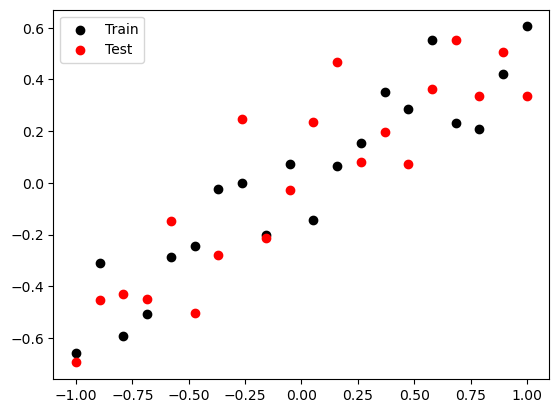

In [17]:
plt.scatter(X_train , y_train , c='black' , label='Train')
plt.scatter(X_test , y_test , c='red' , label='Test')
plt.legend()
plt.show()

### Regression Model

In [18]:
model = Sequential()

model.add(Dense(128,input_dim=1 , activation ='relu'))
model.add(Dense(128 , activation='relu'))
model.add(Dense(1 , activation ='linear'))

adam = Adam(learning_rate= 0.01)


C:\Users\itsam\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,897 (66.00 KB)

 Trainable params: 16,897 (66.00 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(loss='mse', optimizer=adam , metrics=['mse'])

In [21]:
history = model.fit(X_train , y_train , epochs=500 , validation_data=(X_test ,y_test) ,
                   verbose=False)

### Evaluate The Model

In [22]:
_, train_mse = model.evaluate(X_train , y_train , verbose=0)
_, test_mse = model.evaluate(X_test , y_test , verbose=0)

In [24]:
print(f'Train : {train_mse}')
print(f'Test : {test_mse}')

Train : 0.0037460285238921642
Test : 0.044856950640678406


In [25]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


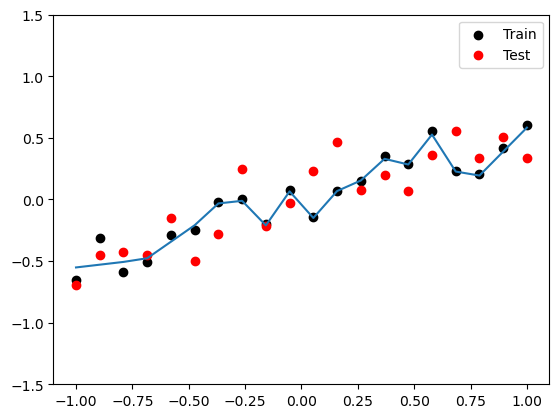

In [26]:
plt.figure()
plt.scatter(X_train , y_train , c='black', label='Train')
plt.scatter(X_test , y_test , c='red' , label ='Test')
plt.plot(X_test , y_pred)

plt.legend()
plt.ylim((-1.5 , 1.5))
plt.show()

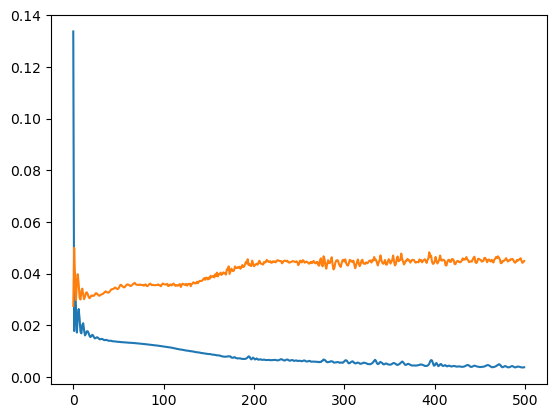

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

### Droupout Model

In [30]:
model = Sequential()

In [32]:
model = Sequential()

model.add(Dense(128,input_dim=1 , activation ='relu'))
model.add(Dropout(0.2))
model.add(Dense(128 , activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1 , activation ='linear'))

adam = Adam(learning_rate= 0.01)


In [33]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 128)                 │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,897 (66.00 KB)

 Trainable params: 16,897 (66.00 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(loss='mse', optimizer=adam , metrics=['mse'])

In [35]:
history = model.fit(X_train , y_train , epochs=500 , validation_data=(X_test ,y_test) ,
                   verbose=False)

In [36]:
_, train_mse = model.evaluate(X_train , y_train , verbose=0)
_, test_mse = model.evaluate(X_test , y_test , verbose=0)

In [37]:
print(f'Train : {train_mse}')
print(f'Test : {test_mse}')

Train : 0.012626752257347107
Test : 0.036117732524871826


In [38]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


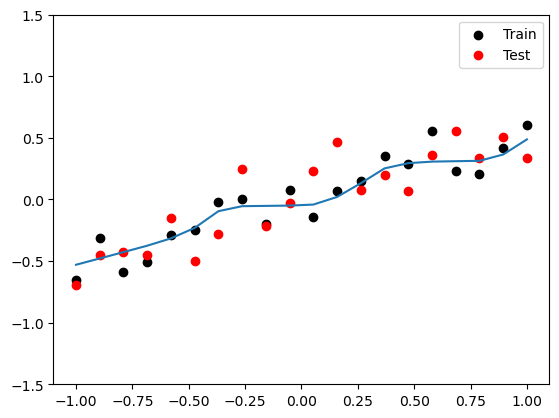

In [39]:
plt.figure()
plt.scatter(X_train , y_train , c='black', label='Train')
plt.scatter(X_test , y_test , c='red' , label ='Test')
plt.plot(X_test , y_pred)

plt.legend()
plt.ylim((-1.5 , 1.5))
plt.show()

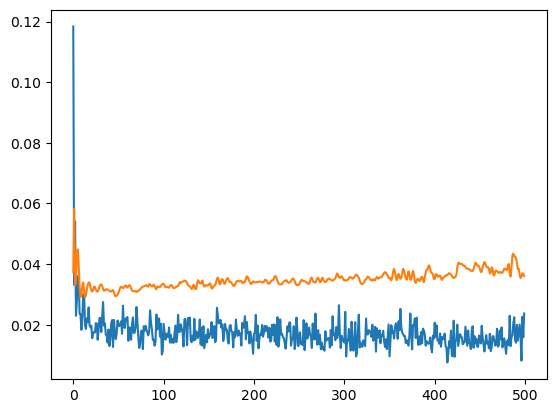

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [45]:
model = Sequential()

In [46]:
model = Sequential()

model.add(Dense(128,input_dim=1 , activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(128 , activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1 , activation ='linear'))

adam = Adam(learning_rate= 0.01)


In [47]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 128)                 │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,897 (66.00 KB)

 Trainable params: 16,897 (66.00 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.compile(loss='mse', optimizer=adam , metrics=['mse'])

In [49]:
history = model.fit(X_train , y_train , epochs=500 , validation_data=(X_test ,y_test) ,
                   verbose=False)

In [50]:
_, train_mse = model.evaluate(X_train , y_train , verbose=0)
_, test_mse = model.evaluate(X_test , y_test , verbose=0)

In [51]:
print(f'Train : {train_mse}')
print(f'Test : {test_mse}')

Train : 0.01594630815088749
Test : 0.03348172456026077


In [52]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


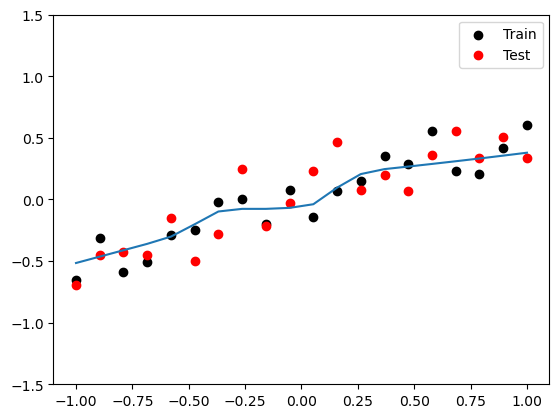

In [53]:
plt.figure()
plt.scatter(X_train , y_train , c='black', label='Train')
plt.scatter(X_test , y_test , c='red' , label ='Test')
plt.plot(X_test , y_pred)

plt.legend()
plt.ylim((-1.5 , 1.5))
plt.show()

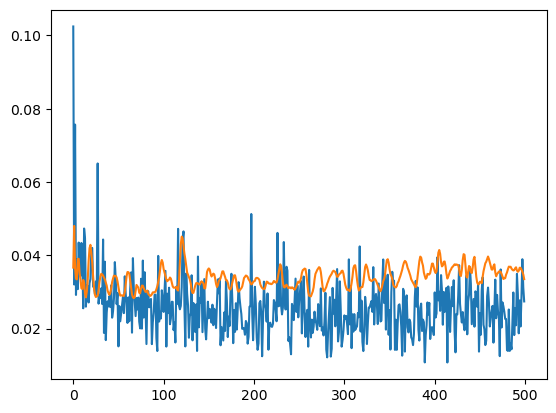

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])